# EDA

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import re 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import nltk 

try: 
    tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')
except:
    print('> trying to download punkt...')
    nltk.download('punkt')
    nltk.data.load('tokenizers/punkt/english.pickle')
    
try: 
    from nltk.corpus import stopwords
except:
    print('> trying to download stopwords...')
    nltk.download('stopwords')
    from nltk.corpus import stopwords

#stops = set(stopwords.words("english"))
stops = set(stopwords.words('russian'))

> trying to download punkt...
[nltk_data] Downloading package punkt to C:\Users\gtesei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
def count_desc_len(x,remove_stopwords=False,stops=stops):
    if not x:
        return 0
    if type(x) != str:
        return 0 
    if len(x) == 0:
        return 0 
    if not remove_stopwords:
        return len(x.split())
    else:
        return len([w for w in [i.lower() for i in x.split()] if not w in stops])

In [3]:
train = pd.read_csv('data/train.csv')
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [4]:
train.shape

(1503424, 18)

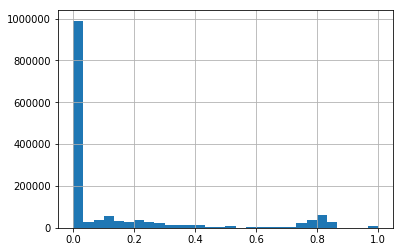

In [5]:
train.deal_probability.hist(bins=30)
plt.show()

## Test 

In [6]:
test = pd.read_csv('data/test.csv')
test.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


In [7]:
train.describe(include='all')

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
count,1503424,1503424,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1.418062e+06,1.503424e+06,1503424,1503424,1390836,1.390836e+06,1.503424e+06
unique,1503424,771769,28,1733,9,47,371,271,1219,788377,1317102,NaN,NaN,21,3,1390836,NaN,NaN
top,3d7e3c37f4f6,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,NaN,NaN,2017-03-20,Private,70d2243d65d9893f2914436ae12d9efec6bb31800151c9...,NaN,NaN
freq,1,1080,141416,63638,697623,282753,226289,150450,50615,15550,2249,NaN,NaN,115190,1075706,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.167081e+05,7.436740e+02,NaN,NaN,NaN,1.241932e+03,1.391306e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.689154e+07,5.572522e+03,NaN,NaN,NaN,9.704641e+02,2.600785e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,9.000000e+00,NaN,NaN,NaN,4.250000e+02,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+03,2.900000e+01,NaN,NaN,NaN,1.057000e+03,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+03,8.800000e+01,NaN,NaN,NaN,2.217000e+03,1.508700e-01


In [8]:
np.sum(train.image_top_1.isnull())

112588

In [9]:
train.image_top_1[train.image.isnull()][:10]

19   NaN
21   NaN
32   NaN
38   NaN
55   NaN
60   NaN
68   NaN
69   NaN
74   NaN
91   NaN
Name: image_top_1, dtype: float64

In [10]:
np.sum(train.item_seq_number.isnull())


0

In [11]:
for c in train.columns:
    print(c,"NA:",np.sum(train[c].isnull()),"  -- unique:",len(train[c].unique()),"/",len(train))

item_id NA: 0   -- unique: 1503424 / 1503424
user_id NA: 0   -- unique: 771769 / 1503424
region NA: 0   -- unique: 28 / 1503424
city NA: 0   -- unique: 1733 / 1503424
parent_category_name NA: 0   -- unique: 9 / 1503424
category_name NA: 0   -- unique: 47 / 1503424
param_1 NA: 61576   -- unique: 372 / 1503424
param_2 NA: 654542   -- unique: 272 / 1503424
param_3 NA: 862565   -- unique: 1220 / 1503424
title NA: 0   -- unique: 788377 / 1503424
description NA: 116276   -- unique: 1317103 / 1503424
price NA: 85362   -- unique: 17007 / 1503424
item_seq_number NA: 0   -- unique: 28232 / 1503424
activation_date NA: 0   -- unique: 21 / 1503424
user_type NA: 0   -- unique: 3 / 1503424
image NA: 112588   -- unique: 1390837 / 1503424
image_top_1 NA: 112588   -- unique: 3063 / 1503424
deal_probability NA: 0   -- unique: 18407 / 1503424


In [12]:
train.dtypes

item_id                  object
user_id                  object
region                   object
city                     object
parent_category_name     object
category_name            object
param_1                  object
param_2                  object
param_3                  object
title                    object
description              object
price                   float64
item_seq_number           int64
activation_date          object
user_type                object
image                    object
image_top_1             float64
deal_probability        float64
dtype: object

In [13]:
train.item_id.dtype == 'object'

True

In [14]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [70]:
meta = {'target': 'deal_probability', 
       'cols': {
           'item_id': 'REM', 
           'user_id': 'CAT', 
           'region': 'CAT', 
           'city':   'CAT', 
           'parent_category_name': 'CAT',
           'category_name': 'CAT',
           'param_1': 'CAT', 
           'param_2': 'CAT', 
           'param_3': 'CAT', 
           'title': 'LEN', 
           'description': 'LEN' , 
           'price': 'NUM', 
           'item_seq_number': 'NUM', 
           'activation_date': 'DATE',           
           'user_type': 'CAT', 
           'image': 'REM',
           'image_top_1': 'NUM'
       }}

meta

{'cols': {'activation_date': 'DATE',
  'category_name': 'CAT',
  'city': 'CAT',
  'description': 'LEN',
  'image': 'REM',
  'image_top_1': 'NUM',
  'item_id': 'REM',
  'item_seq_number': 'NUM',
  'param_1': 'CAT',
  'param_2': 'CAT',
  'param_3': 'CAT',
  'parent_category_name': 'CAT',
  'price': 'NUM',
  'region': 'CAT',
  'title': 'LEN',
  'user_id': 'CAT',
  'user_type': 'CAT'},
 'target': 'deal_probability'}

In [77]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

def encode_dataset(train,test,meta):
    y_train = train[meta['target']]
    train = train.drop([meta['target']],axis=1)
    assert train.shape[1] == test.shape[1]
    for i in range(train.shape[1]):
        assert train.columns[i] == test.columns[i]
    train_obs = len(train)
    #
    all_data = pd.concat([train,test],axis=0)
    for i,f in enumerate(meta['cols'].keys()):
        print(i,f,meta['cols'][f])
        if meta['cols'][f] == 'CAT':
            all_data[f] = all_data[f].fillna('missing')
            encoder = LabelEncoder()
            encoder.fit(all_data[f]) 
            all_data[f] = encoder.transform(all_data[f])
        elif meta['cols'][f] == 'NUM':
            all_data[f] = all_data[f].fillna(-1)
        elif meta['cols'][f] == 'DATE':
            tmp = pd.to_datetime(all_data[f])
            all_data[f] = tmp.dt.weekday
            cal = calendar()
            holidays = cal.holidays(start=tmp.min(), end=tmp.max())
            all_data[f+'_is_holiday'] = 1*tmp.isin(holidays)
        elif meta['cols'][f] == 'REM':
            all_data = all_data.drop(f,axis=1)
        elif meta['cols'][f] == 'LEN':
            all_data[f+'_len'] = all_data[f].apply(count_desc_len)
            all_data = all_data.drop(f,axis=1)
        else:
            raise Exception(str(meta['cols'][f])+":unknown mapping")
    assert train_obs == len(y_train)
    return all_data , y_train

all_data , y_train = encode_dataset(train=train[:100],test=test[:100],meta=meta)

0 user_id CAT
1 region CAT
2 parent_category_name CAT
3 description LEN
4 category_name CAT
5 item_seq_number NUM
6 image REM
7 price NUM
8 param_2 CAT
9 item_id REM
10 title LEN
11 param_3 CAT
12 activation_date DATE
13 user_type CAT
14 image_top_1 NUM
15 city CAT
16 param_1 CAT


In [79]:
all_data.head(20)

,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,activation_date,user_type,image_top_1,description_len,title_len,activation_date_is_holiday
0,168,19,18,4,36,38,7,45,400.0,2,1,1,1008.0,7,3,0
1,40,17,58,2,20,17,7,45,3000.0,19,6,1,692.0,7,3,0
2,108,16,57,0,2,6,7,45,4000.0,9,0,1,3032.0,17,2,0
3,138,21,35,4,36,3,7,45,2200.0,286,5,0,796.0,3,1,0
4,181,4,14,6,0,46,10,6,40000.0,3,3,1,2264.0,4,3,0
5,135,21,77,4,36,3,7,45,1300.0,9,1,1,796.0,3,2,0
6,6,11,40,2,32,48,7,45,11000.0,125,3,1,2823.0,21,5,0
7,197,15,50,4,24,18,17,10,500.0,61,5,1,567.0,4,2,0
8,3,14,49,4,24,18,27,37,500.0,85,4,1,415.0,5,1,0
9,191,11,40,4,8,10,25,9,400.0,136,2,0,46.0,11,4,0


In [17]:
 y_train.head()

0    0.12789
1    0.00000
2    0.43177
3    0.80323
4    0.20797
Name: deal_probability, dtype: float64

In [18]:
len(y_train)

10

In [19]:
all_data.dtypes

user_id                         int64
region                          int64
city                            int64
parent_category_name            int64
category_name                   int64
param_1                         int64
param_2                         int64
param_3                         int64
price                         float64
item_seq_number                 int64
activation_date                 int64
user_type                       int64
image_top_1                   float64
activation_date_is_holiday      int32
dtype: object

### activation_date

In [20]:
most_recent_train = pd.to_datetime(train.activation_date).max()
most_recent_train

Timestamp('2017-04-07 00:00:00')

In [21]:
least_recent_train = pd.to_datetime(train.activation_date).min()
least_recent_train

Timestamp('2017-03-15 00:00:00')

In [22]:
most_recent_test = pd.to_datetime(test.activation_date).max()
most_recent_test

Timestamp('2017-04-20 00:00:00')

In [23]:
least_recent_test = pd.to_datetime(test.activation_date).min()
least_recent_test

Timestamp('2017-04-12 00:00:00')

### Same User 

In [24]:
auser  = '45ba3f23bf25' 
train[train.user_id==auser]

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
1333,1c2963f01ede,45ba3f23bf25,Иркутская область,Саянск,Бытовая электроника,Товары для компьютера,Клавиатуры и мыши,NaN,NaN,23.03/ Мышь оптическая проводная в блистере,Телефон магазина в объявлении. Уточняйте нали...,390.0,72090,2017-03-23,Shop,573ff2118089e3f5af17dd0b90200851afbbf3ba04e23f...,2826.0,0.00000
4062,d3e7c9a53892,45ba3f23bf25,Иркутская область,Иркутск,Бытовая электроника,Планшеты и электронные книги,Планшеты,NaN,NaN,17.03/ Планшет Samsung SM-T110 8Gb,— тыловая камера 2 Мпикс,4499.0,71290,2017-03-17,Shop,a9b164750803ecabfb744b03faab1402ebc756b77c36fd...,2877.0,0.00000
5514,b787659b066d,45ba3f23bf25,Иркутская область,Иркутск,Бытовая электроника,Телефоны,LG,NaN,NaN,20.03/ LG-p713,"— смартфон, Android 4.4/\n— экран 4.3"", разреш...",2499.0,71448,2017-03-20,Shop,fadddb730c0468f1ee596242a232b172ffd876e97cfb7b...,2942.0,0.00000
5576,7ea6632deae5,45ba3f23bf25,Иркутская область,Саянск,Бытовая электроника,Телефоны,Alcatel,NaN,NaN,16.03/ Aлкatel 4007дотходитсзу,"— смартфон, Android 2.3/\n— поддержка двух SIM...",999.0,71140,2017-03-16,Shop,c77cf41b66e9958fa4054d113ccd7e2bb781cef3f9f730...,2007.0,0.00000
6780,c03aed0f335b,45ba3f23bf25,Иркутская область,Иркутск,Бытовая электроника,Телефоны,BQ,NaN,NaN,22.03/ bqbqm-1831,— телефон/\n— поддержка двух SIM-карт/\n— экра...,899.0,71914,2017-03-22,Shop,3b0faf89ea060f3ab4d96c5c1cbbb1ea894f1ead988337...,2009.0,0.12754
7396,db71089906d0,45ba3f23bf25,Иркутская область,Иркутск,Бытовая электроника,Аудио и видео,"Акустика, колонки, сабвуферы",NaN,NaN,"23.03/ Колонка игрушка ""Миньон""",Каждый день сотни новых товаров в нашем магази...,799.0,72118,2017-03-23,Shop,821649244a931f4537a97ed685637ac09226934a5a608e...,3031.0,0.00000
8830,ec147d90dffa,45ba3f23bf25,Иркутская область,Братск,Бытовая электроника,Телефоны,Другие марки,NaN,NaN,23.03/ Jinga ф100,— телефон/\n— поддержка двух SIM-карт/\n— экра...,999.0,72000,2017-03-22,Shop,a24f648f2d8d98d06a32b3c79a61468f677e1eabe6d05d...,2916.0,0.00000
9286,85a4977c673d,45ba3f23bf25,Иркутская область,Зима,Бытовая электроника,Телефоны,Sony,NaN,NaN,27.03/ Sony D5503,"(нет заглушки ЗУ и кнопки громкости, неиправн...",5899.0,72559,2017-03-27,Shop,8632e75cd3a1ce08816d1f6ce953310d228a4bc88257cc...,2944.0,0.00000
9378,247be24cea59,45ba3f23bf25,Иркутская область,Братск,Бытовая электроника,Телефоны,Lenovo,NaN,NaN,28.03/ LenovoS860,"— смартфон, Android 4.2/\n— поддержка двух SIM...",4899.0,72835,2017-03-28,Shop,a2fd0f79bf88e903c1c42ccdb7d03aeb68ea9709d4c2a0...,760.0,0.00000
10031,bec69fc5c75d,45ba3f23bf25,Иркутская область,Иркутск,Бытовая электроника,Телефоны,Micromax,NaN,NaN,27.03/ MicromaxD320,"— смартфон, Android 4.4/\n— поддержка двух SIM...",2899.0,72532,2017-03-27,Shop,d3b0e14054706e07bd7ff5498f0daa5524d66c6d48ee55...,2931.0,0.00000


### item_seq_number

In [83]:
train.item_seq_number.describe()

count    1.503424e+06
mean     7.436740e+02
std      5.572522e+03
min      1.000000e+00
25%      9.000000e+00
50%      2.900000e+01
75%      8.800000e+01
max      2.044290e+05
Name: item_seq_number, dtype: float64

In [84]:
len(train.item_seq_number.unique()) , len(train)

(28232, 1503424)

In [85]:
np.sum(train.item_seq_number.isnull())

0

In [88]:
item_seq_number_group = train.groupby('item_seq_number').apply(lambda x : len(x))

In [89]:
item_seq_number_group.head()

item_seq_number
1    90378
2    58481
3    48047
4    42074
5    37679
dtype: int64

In [90]:
train[train['item_seq_number']==1]

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
34,2285e797fe2d,5977e301114d,Саратовская область,Саратов,Транспорт,Автомобили,С пробегом,Audi,80,"Audi 80, 1986","Отличный надёжный немец, на очень бодром ходу!...",65000.0,1,2017-03-25,Private,9dc0755c29addc765567c613087fbcabfd62f1555772f4...,1132.0,0.67548
49,a285d4daec8a,e76f336932dc,Пермский край,Пермь,Личные вещи,Красота и здоровье,Приборы и аксессуары,NaN,NaN,Набор для маникюра,Продам набор всё для маникюра /\nИспользовала ...,5000.0,1,2017-03-17,Private,5e81097b80319562099bce5d0847433444ee5b51da1afa...,1039.0,0.15719
92,c2468f15b136,451e557a9de6,Краснодарский край,Петровская,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Яйцо куриное,Яйцо домашние всегда свежее.,60.0,1,2017-03-19,Private,NaN,NaN,0.11508
94,e82d211653ae,479530574f40,Омская область,Омск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Свадебные платья,40–42 (XS),Новые свадебные платья,"Закрыла салон в прошлом году, платья новые, п...",8500.0,1,2017-03-23,Private,23dec721e37db33b2b11ca151174fa589dc3d8040ba682...,560.0,0.00000
135,aee328ab0cf6,4013e81e0a76,Татарстан,Казань,Транспорт,Автомобили,С пробегом,ГАЗ,ГАЗель,"ГАЗ ГАЗель, 2010",Газель в отличном состоянии. Двигатель от Уаза...,300000.0,1,2017-03-15,Private,8b095c09157ed9783fc3adf3eb1e8578434ed483f10988...,1055.0,0.00000
148,258b5172a67b,cdb504ba77b6,Волгоградская область,Волгоград,Недвижимость,Гаражи и машиноместа,Продам,Гараж,Металлический,"Гараж, 12 м²","продаю гараж, имеется смотровая яма, погреб, э...",85000.0,1,2017-03-28,Private,NaN,NaN,0.12981
151,faca2386e135,b7d8629ae841,Нижегородская область,Сосновское,Недвижимость,"Дома, дачи, коттеджи",Продам,Дом,NaN,Дом 35.9 м² на участке 30 сот.,Продаю дом в хорошем состоянии.Две светлые ком...,800000.0,1,2017-03-27,Private,4d6180fbe6033087150ca7e7c7ee82cd65a5494166ad4f...,1516.0,0.20952
174,2bef5deb2c5f,e0c3868a7615,Краснодарский край,Ильский,Услуги,Предложение услуг,"Транспорт, перевозки",Переезды,NaN,Грузоперевозки,Доставка грузов по району и краю по доступным ...,350.0,1,2017-03-27,Private,64e8112d12f57e03ee21e5e9ecf0220366801523335b81...,1203.0,0.00000
184,583e51812631,5fb3ed5df853,Саратовская область,Саратов,Услуги,Предложение услуг,"Ремонт, строительство",Отделочные работы,NaN,Отделка,Выполним работы по отделке квартир коттеджей и...,NaN,1,2017-03-19,Private,9849d8ec29d6202e70859f97bc1eb7aed61e0020a40e6c...,1429.0,0.00000
191,85b007444f5a,bd759bb532e6,Оренбургская область,Октябрьское,Бытовая электроника,"Игры, приставки и программы",Игровые приставки,NaN,NaN,Xbox 360,"+5 игар фифа15,16 мартол комбат 9, гта5,асасси...",7000.0,1,2017-03-28,Private,6a9d3c3a0af20112453b6bdf690259a3902f705ab26a6c...,2901.0,0.16555


In [91]:
train = pd.read_csv('data/train.csv')


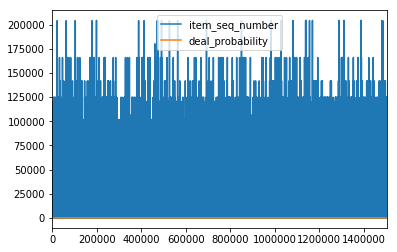

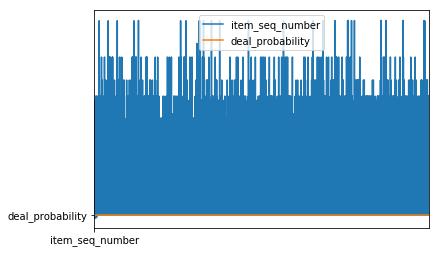

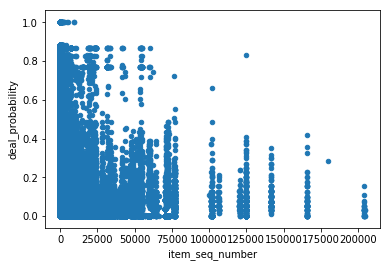

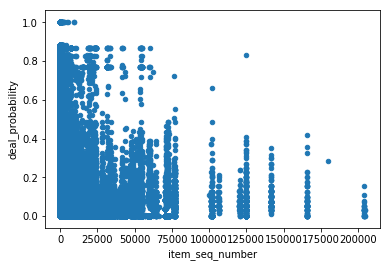

In [97]:
train[['item_seq_number','deal_probability']].plot.scatter(x='item_seq_number',y='deal_probability')
plt.show()

In [98]:
is_min = train.item_seq_number.min()
is_max = train.item_seq_number.max()
is_min , is_max

(1, 204429)

In [103]:
nbins = 1000
step = int((is_max-is_min)/nbins)
step

204

In [120]:
ba = is_min
bin_list = [] 
item_seq_number_avg = []
deal_prob_list = [] 
for i in range(nbins):
    tt = train[(train["item_seq_number"]>ba) & (train["item_seq_number"]<(ba+step)) ]
    bin_list.append(i)
    item_seq_number_avg.append(tt.item_seq_number.mean())
    deal_prob_list.append(tt.deal_probability.mean())
    ba = ba + step 

In [123]:
bindf = pd.DataFrame({'bin': bin_list , 'item_seq_number_avg': item_seq_number_avg , 'deal_prob_list': deal_prob_list})
bindf.head()

,bin,deal_prob_list,item_seq_number_avg
0,0,0.142173,41.230119
1,1,0.105941,284.915060
2,2,0.097128,497.175825
3,3,0.088799,709.826550
4,4,0.082126,911.890633


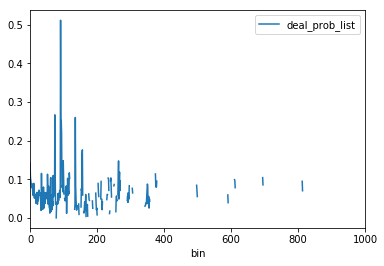

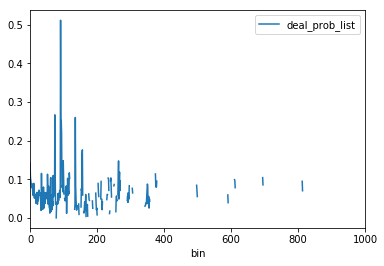

In [125]:
bindf.plot(x='bin', y='deal_prob_list')
plt.show()